In [ ]:
%load_ext rpy2.ipython
#to run R in Python

In [ ]:
#load common packages
%%R
install.packages ("dplyr")
library(dplyr)
install.packages ("ggplot2")
library(ggplot2)
install.packages ("caTools")
library(caTools)
install.packages ("GGally")
library (GGally)

In [ ]:
#lets load the dataset
%%R
data (swiss)
head(swiss)

             Fertility Agriculture Examination Education Catholic
Courtelary        80.2        17.0          15        12     9.96
Delemont          83.1        45.1           6         9    84.84
Franches-Mnt      92.5        39.7           5         5    93.40
Moutier           85.8        36.5          12         7    33.77
Neuveville        76.9        43.5          17        15     5.16
Porrentruy        76.1        35.3           9         7    90.57
             Infant.Mortality
Courtelary               22.2
Delemont                 22.2
Franches-Mnt             20.2
Moutier                  20.3
Neuveville               20.6
Porrentruy               26.6


In [ ]:
#lets check for missing values
%%R
any(is.na(swiss))

[1] FALSE


In [ ]:
#lets create a binary outcome variable based on Fertility rate
%%R
swiss$HighFertility <- ifelse(swiss$Fertility > median(swiss$Fertility), 1, 0)
swiss$HighFertility

 [1] 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1
[39] 0 0 1 0 1 0 0 0 0


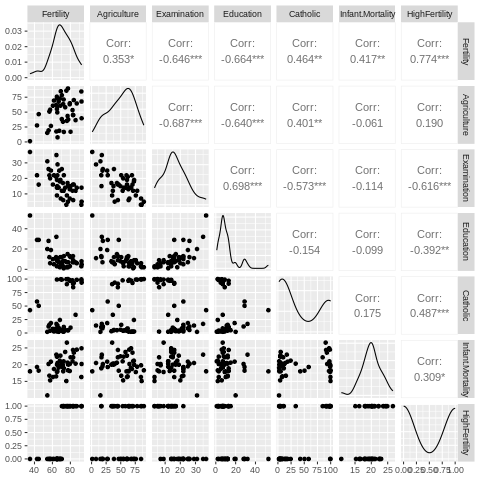

In [ ]:
# Create a pair plot
%%R
ggpairs(swiss)

In [ ]:
#Let’s set a random seed. Train/test split is a random process,
#Ensure that randomization works the same on yours and my computer
%%R
set.seed(42)

In [ ]:
#Let’s split data now.
#70% of the data is used for training,
#and the remaining 30% is used for testing.
%%R
sampleSplit <- sample.split (Y=swiss$Agriculture, SplitRatio=0.7)
trainSet <- subset (x=swiss, sampleSplit==TRUE)
testSet <- subset (x=swiss, sampleSplit==FALSE)

In [ ]:
#Let's check the names of the trainSet
%%R
names (trainSet)

[1] "Fertility"        "Agriculture"      "Examination"      "Education"       
[5] "Catholic"         "Infant.Mortality" "HighFertility"   


In [ ]:
#Let's check the names of the testSet
%%R
names (testSet)

[1] "Fertility"        "Agriculture"      "Examination"      "Education"       
[5] "Catholic"         "Infant.Mortality" "HighFertility"   


In [ ]:
#Bulding a model
%%R
model <- glm (HighFertility ~ Agriculture+Examination+Education+Catholic+Infant.Mortality, data=trainSet, family= "binomial")

In [ ]:
#summary of the model
%%R
summary(model)


Call:
glm(formula = HighFertility ~ Agriculture + Examination + Education + 
    Catholic + Infant.Mortality, family = "binomial", data = trainSet)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)  
(Intercept)       9.97170    8.08669   1.233   0.2175  
Agriculture      -0.12225    0.07218  -1.694   0.0903 .
Examination      -0.52462    0.26793  -1.958   0.0502 .
Education        -0.03826    0.14132  -0.271   0.7866  
Catholic          0.02214    0.01891   1.171   0.2416  
Infant.Mortality  0.25108    0.35025   0.717   0.4735  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 42.34  on 31  degrees of freedom
Residual deviance: 16.72  on 26  degrees of freedom
AIC: 28.72

Number of Fisher Scoring iterations: 7



In [ ]:
#making predictions on the Training set
%%R
predictTrain = predict(model, type="response")

In [ ]:
%%R
tapply(predictTrain, trainSet$HighFertility, mean)

        0         1 
0.2066793 0.8759924 


The true "no high fertility" cases, model predicts an average probability of about 0.206 and true "high fertility" cases as 0.875

There are two types of errors that this model can make:
1. where the model predicts 1, or "no high fertility", but the actual outcome is 0,
2. Where the model predicts 0, or "high fertility", but the actual outcome is 1.

In [ ]:
#Confusion matrix

#Sensitivity = TP/(TP + FN)
#Specificity = TN/(TN + FP)

#Let's set the confusion matrix for threshold of 0.5
%%R
table(trainSet$HighFertility, predictTrain > 0.5)

   
    FALSE TRUE
  0    10    2
  1     0   20


In [ ]:
#Sensitivity for 0.5
%%R
20/20

[1] 1


In [ ]:
#Specificity for 0.5
%%R
10/12

[1] 0.8333333


In [ ]:
#Confusion matrix
#Let's set the confusion matrix for threshold of 0.7
%%R
table(trainSet$HighFertility, predictTrain > 0.7)

   
    FALSE TRUE
  0    10    2
  1     3   17


In [ ]:
#Sensitivity for 0.7
%%R
17/20

[1] 0.85


In [ ]:
#Specificity for 0.7
%%R
10/12

[1] 0.8333333


In [ ]:
#Confusion matrix
#Let's set the confusion matrix for threshold of 0.2
%%R
table(trainSet$HighFertility, predictTrain > 0.2)

   
    FALSE TRUE
  0     9    3
  1     0   20


In [ ]:
#Sensitivity for 0.2
%%R
20/20

[1] 1


In [ ]:
#Specificity for 0.7
%%R
9/12

[1] 0.75


Picking a good threshold value is often challenging. A Receiver Operator Characteristic curve, or ROC curve, can help us decide which value of the threshold is best.

In [ ]:
%%R
install.packages("ROCR")
library(ROCR)

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpnkYMlX/downloaded_packages’



In [ ]:
#we are now going to predict our observed data based on model
%%R
names (trainSet)

[1] "Fertility"        "Agriculture"      "Examination"      "Education"       
[5] "Catholic"         "Infant.Mortality" "HighFertility"   


In [ ]:
#And now we can finally make predictions.
%%R
prediction <- predict(model, newdata=subset(trainSet,select=c(2,3,4,5,6)), type="response")
probability <- prediction(prediction, trainSet$HighFertility)
performance <- performance(probability, measure = "tpr", x.measure = "fpr")

#We are going to predict earch individual obervations by using the model

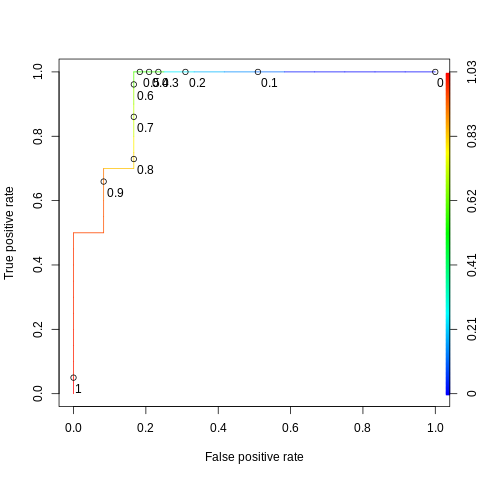

In [ ]:
%%R
plot(performance, colorize=TRUE, print.cutoffs.at=seq(0,1,by=0.1), text.adj=c(-0.2,1.7))

0.05 maximizes the true positive rate while keeping the false positive rate really low.

In [ ]:
#Let's test the model in the test data/unseen data set to see the model performance
%%R
predictionTest <- predict(model, newdata=subset(testSet,select=c(2,3,4,5,6)))

In [ ]:
%%R
table(testSet$HighFertility, predictionTest >= 0.5)

   
    FALSE TRUE
  0    10    2
  1     0    3


In [ ]:
#accuracy
13/15

0.8666666666666667

Our model can accurately identify high fertility in the test set/new data set, with an accuracy of 86% at a threshold of 0.5